Iterations:  1
x1:  4.333333333333333
x2:  -0.047619047619047894
x3:  2.7142857142857144




C:\Users\Nate\AppData\Local\Temp\ipykernel_10348\2170326605.py:56: RuntimeWarning: invalid value encountered in sqrt
  return np.array([x1**2 + np.sqrt(x2) - x3**3 - 2,
C:\Users\Nate\AppData\Local\Temp\ipykernel_10348\2170326605.py:79: RuntimeWarning: invalid value encountered in sqrt
  return x1**2 + np.sqrt(x2) - x3**3 - 2
C:\Users\Nate\AppData\Local\Temp\ipykernel_10348\2170326605.py:133: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y, Z+z, [z], zdir='z')
c:\Users\Nate\anaconda3\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
c:\Users\Nate\anaconda3\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Nate\AppData\Local\Temp\ipykernel_10348\2170326605.py:139: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X, Y+y, Z, [y], zdir='y')


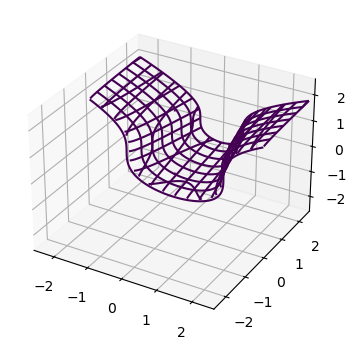

C:\Users\Nate\AppData\Local\Temp\ipykernel_10348\2170326605.py:144: UserWarning: No contour levels were found within the data range.
  cset = ax.contour(X+x, Y, Z, [x], zdir='x')


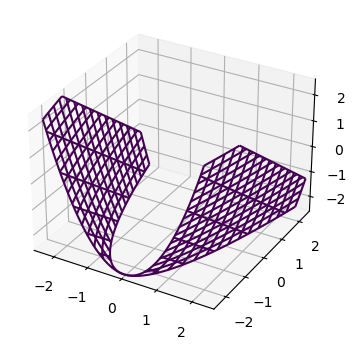

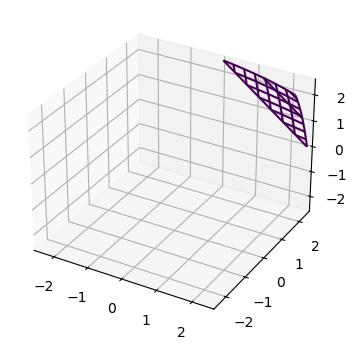

In [24]:
## Broyden's method according to Burden's Numerical Analysis
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import broyden1
from mpl_toolkits.mplot3d import axes3d

# define broydens method with Sherman Morrison Formula 
def broyden(x1, x2,x3, f_equations, B_equations, tol, maxIters):
    
    #iterate counter 
    steps_taken = 0

    # evaluate functions 
    f = f_equations(x1,x2,x3)
 
    # inverting B matrix
    B = np.linalg.inv(B_equations(x1,x2,x3))
 
    # two conditions, 1) 2 norm (Frobenius norm in this case) exceeds tolerance
    # or 2) steps_taken exceeds iterations
    while np.linalg.norm(f,2) > tol and steps_taken < maxIters:
        
        d = B.dot(f_equations(x1,x2,x3))
 
        x1 = x1 - d[0]
        x2 = x2 - d[1]
        x3 = x3 - d[2]
 
        newf = f_equations(x1,x2,x3)
        z = newf - f
 
        # m = B(i-1)^-1 * [F(x(i)) - F(x(i-1))]  
        m = B.dot(z)

        # s = x(i) - x(i-1) 
        s = - 1 * d
 
        B = B  + np.dot(((s-m).dot(s)), B) / np.dot(s,m)
 
        f = newf
        steps_taken += 1
 
    return steps_taken, x1, x2, x3
 
# broydens function is currently set up for 2 equations with
# 2 unknowns but can be modified for larger systems 
# define tolerance, max iterations, and xin = initial vector 
tol = 10.0**-10
maxIters = 50
xin = np.array([1.0,1.0, 1.0])

# define function and evaluate 
def fs(x1,x2,x3):
    return np.array([x1**2 + np.sqrt(x2) - x3**3 - 2, 
                     x1**2 - x2 - x3 - 5, 
                     x1 + np.exp(x2-1) +x3 -7])

# first evaluation of Jacobian (labeled B here) 
def Bs(x1,x2,x3):
    return np.array([[2,1/2.0, -3], 
                     [2, -1, -1],
                     [1, 1,1]])
 
#A = np.array([[1,2], [2, 16]])
 
n, x1, x2, x3 = broyden(xin[0], xin[1],xin[2], fs, Bs, tol, maxIters)
print("Iterations: ", n)
print("x1: ", x1)
print("x2: ", x2)
print("x3: ", x3)
print()
# print scipy's broyden1() approximate solution with same initial vector 
#print("Scipy approximate solution: " , broyden1(np.ndarray.tolist(fs(1,1,1)), [1,1,1]))
print()

def f1(x1,x2,x3):
    return x1**2 + np.sqrt(x2) - x3**3 - 2

def f2(x1,x2,x3):
    return x1**2 - x2 - x3 - 5

def f3(x1,x2,x3):
   return x1 + np.exp(x2-1) +x3 -7

def print_2d():
    # create new figure 
    fig = plt.figure(1, figsize=(5,5), facecolor="pink")

    # step size for value ranges
    delta = 0.25 
    #create range of values 
    x1,x2,x3 = np.meshgrid(np.arange(-10.1,10.1,delta), np.arange(-10.1,10.1,delta))

    # graph stuff
    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # plot functions
    plt.contour(x1, x2,x3, f1, [0], colors = "green")
    plt.contour(x1, x2,x3, f2, [0], colors = "red")
    plt.contour(x1, x2,x3, f3, [0], colors = "purple")

    #labels = ['f1', 'f2']
    #plt.legend()

    #label axis
    plt.xlabel("x")
    plt.ylabel("y")

    # constrain graph window 
    plt.xlim([-3, 5])
    plt.ylim([-3, 5])

    # display graph
    plt.show()

def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    plt.show()

plot_implicit(f1)
plot_implicit(f2)
plot_implicit(f3)